In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
import scipy.stats as stats

from google.colab import files


In [ ]:
df = pd.read_csv('/content/df2.csv', delimiter = ',')
df.head()

,Make,Model,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,class,prestige
0,Toyota,Prius,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727,4,2
1,Renault,Grand Scenic,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000,4,2
2,Renault,Laguna,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000,3,3
3,Opel,Astra,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000,3,3
4,Mercedes,Vito,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636,3,4


Матрица корреляций показывает, что признаками, наиболее влияющими на стоимость есть:

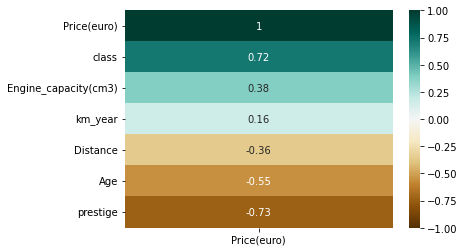

In [ ]:
heatmap = sns.heatmap(df.corr()[['Price(euro)']].sort_values(by='Price(euro)', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [ ]:
df=df.drop("class",axis=1)

In [ ]:
X=df.select_dtypes(include=np.number).drop("Price(euro)",axis=1)
Y=df['Price(euro)']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

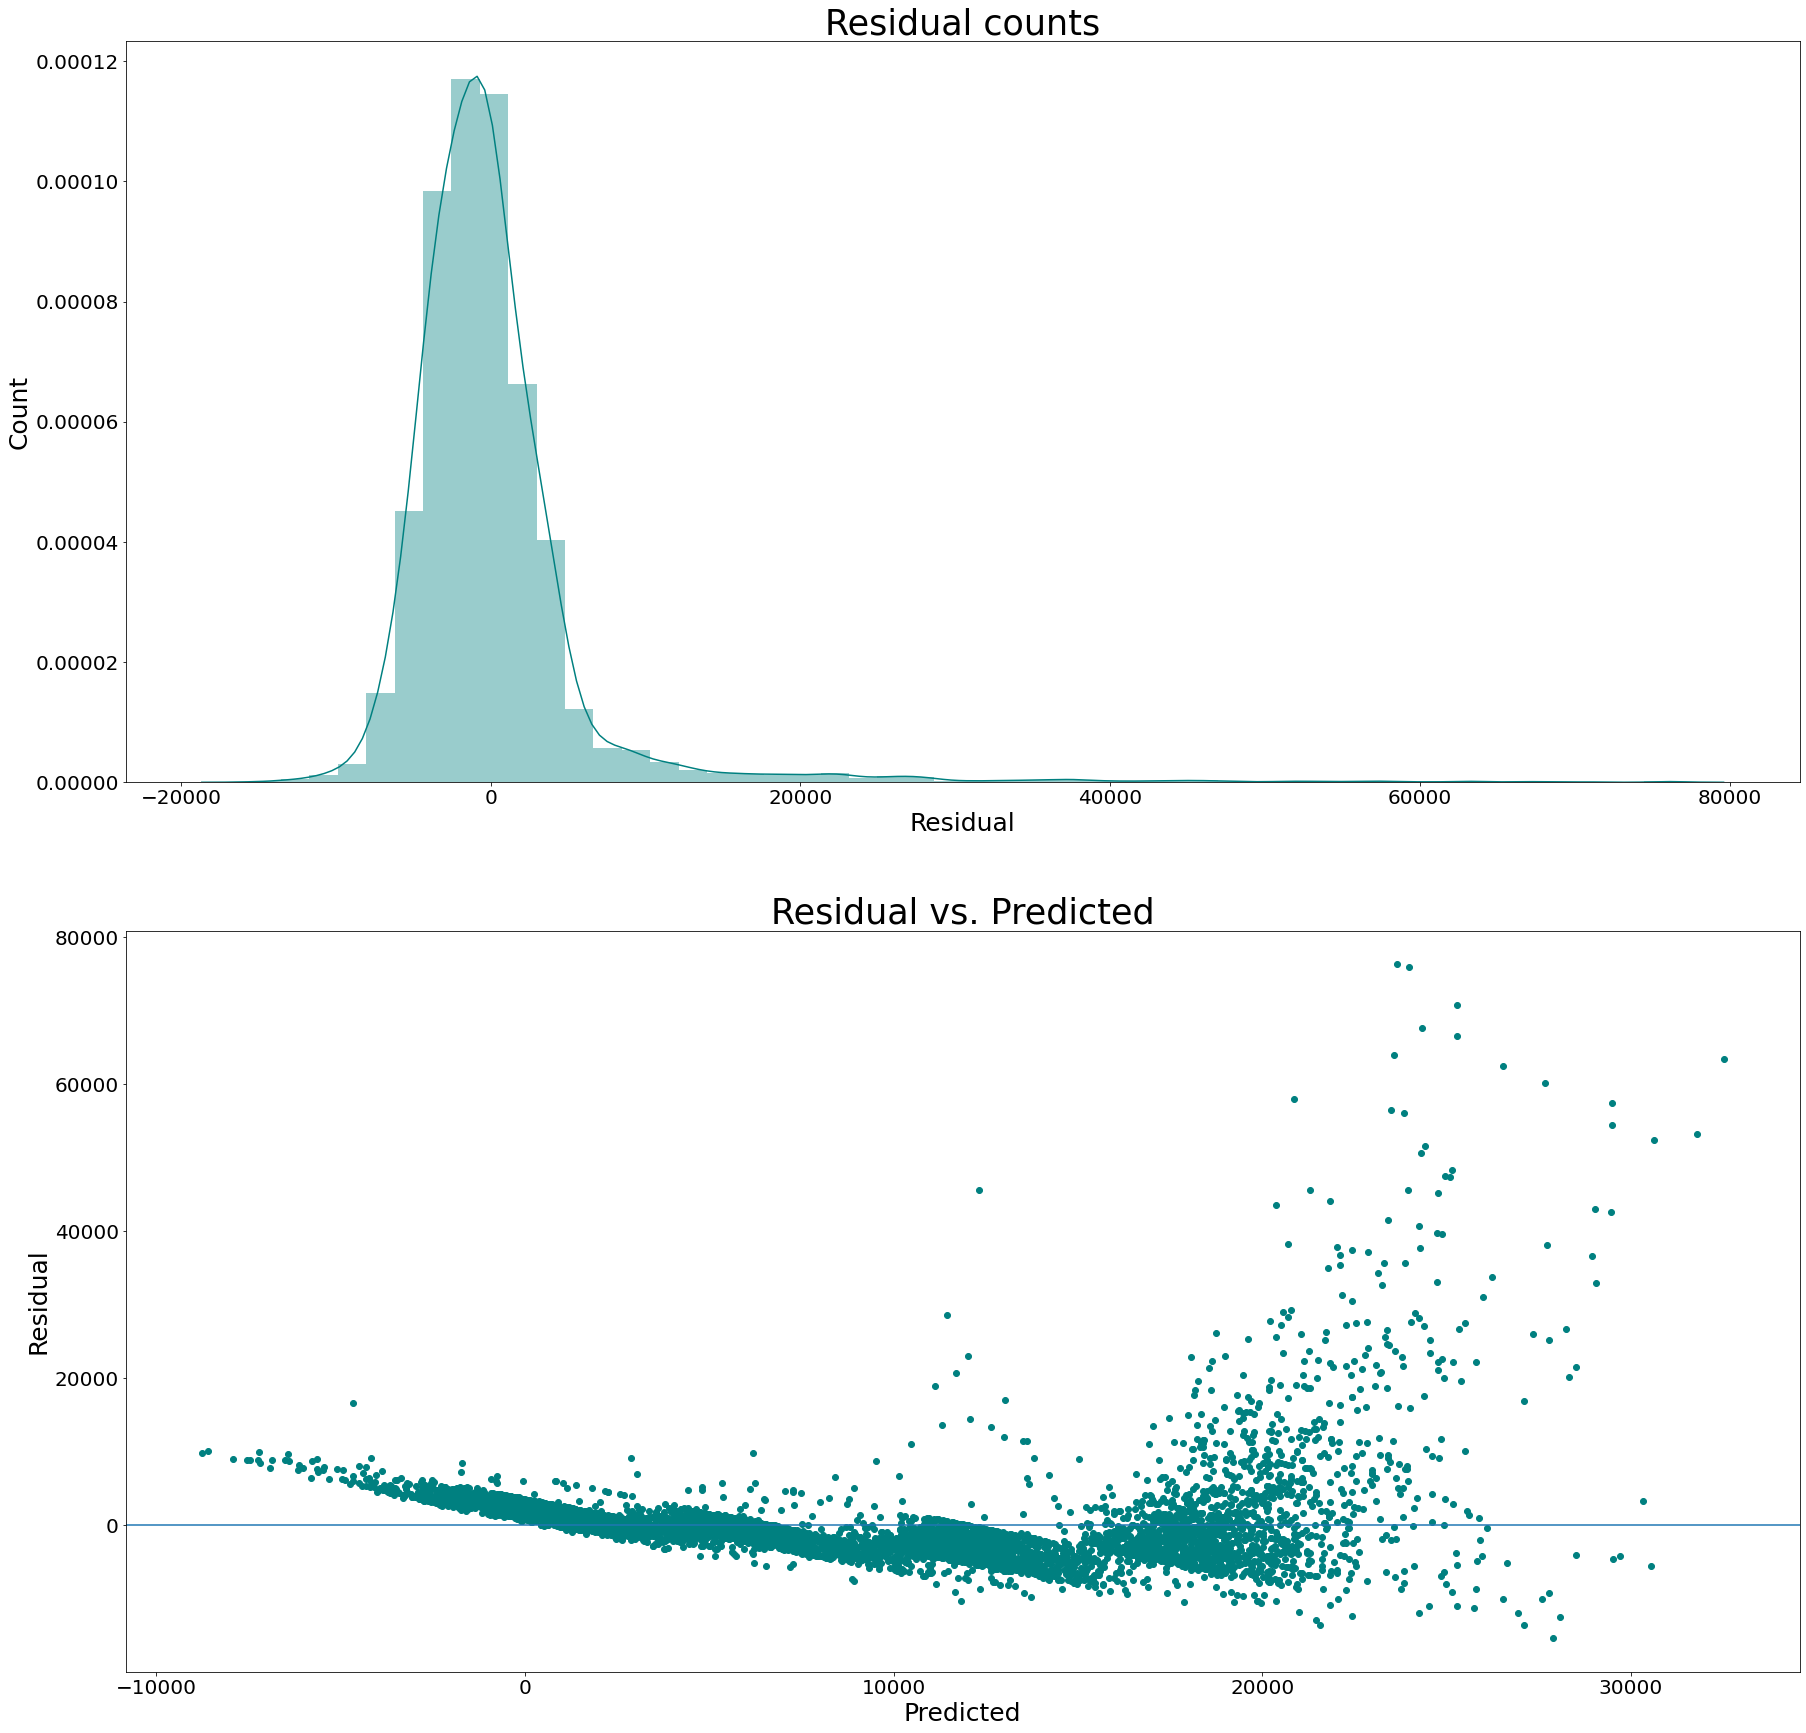

In [ ]:

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()


rmse = np.sqrt(mean_squared_error(Y_test, predicted))

print('RMSE: ',rmse)

print('Variance score: %.2f' % r2_score(Y_test, predicted))


RMSE:  6302.776375387437
Variance score: 0.59
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


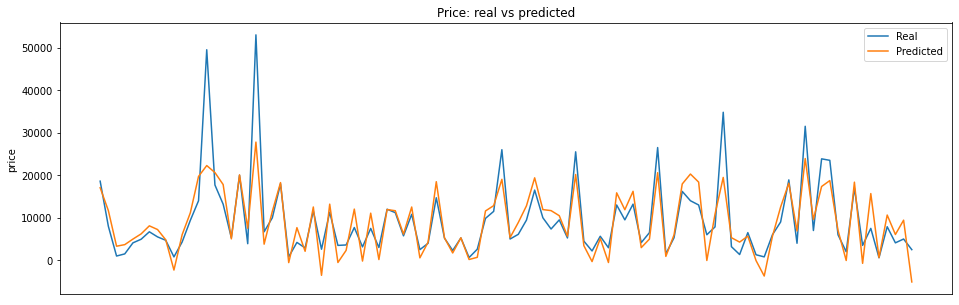

In [ ]:
A = np.array(Y_test).reshape(-1, 1)
B = predicted.reshape(-1, 1)
print(type(predicted))
print(type(Y_test))
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price")
plt.xticks(())
plt.show()

In [ ]:
coeff_parameter = pd.DataFrame(regr.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
Distance,-0.011414
Engine_capacity(cm3),3.666347
Age,-209.955540
km_year,-0.050540
prestige,-4434.375083


наиболее значимые признаки для модели проанализировав веса будет те признаки которые  есть выше значение(веса) от нуля несмотя (- или +)

Text(0, 0.5, 'Ordered Values')

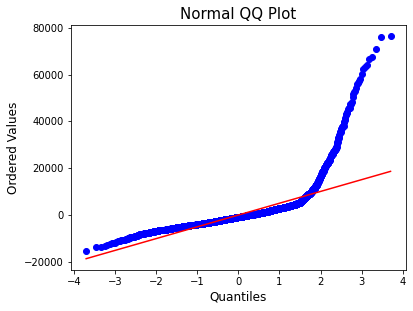

In [ ]:
plt.figure(figsize=(6, 4.5))
stats.probplot(residual, dist="norm", plot=plt)
plt.title('Normal QQ Plot',fontsize=15)
plt.xlabel('Quantiles',fontsize=12)
plt.ylabel('Ordered Values',fontsize=12)

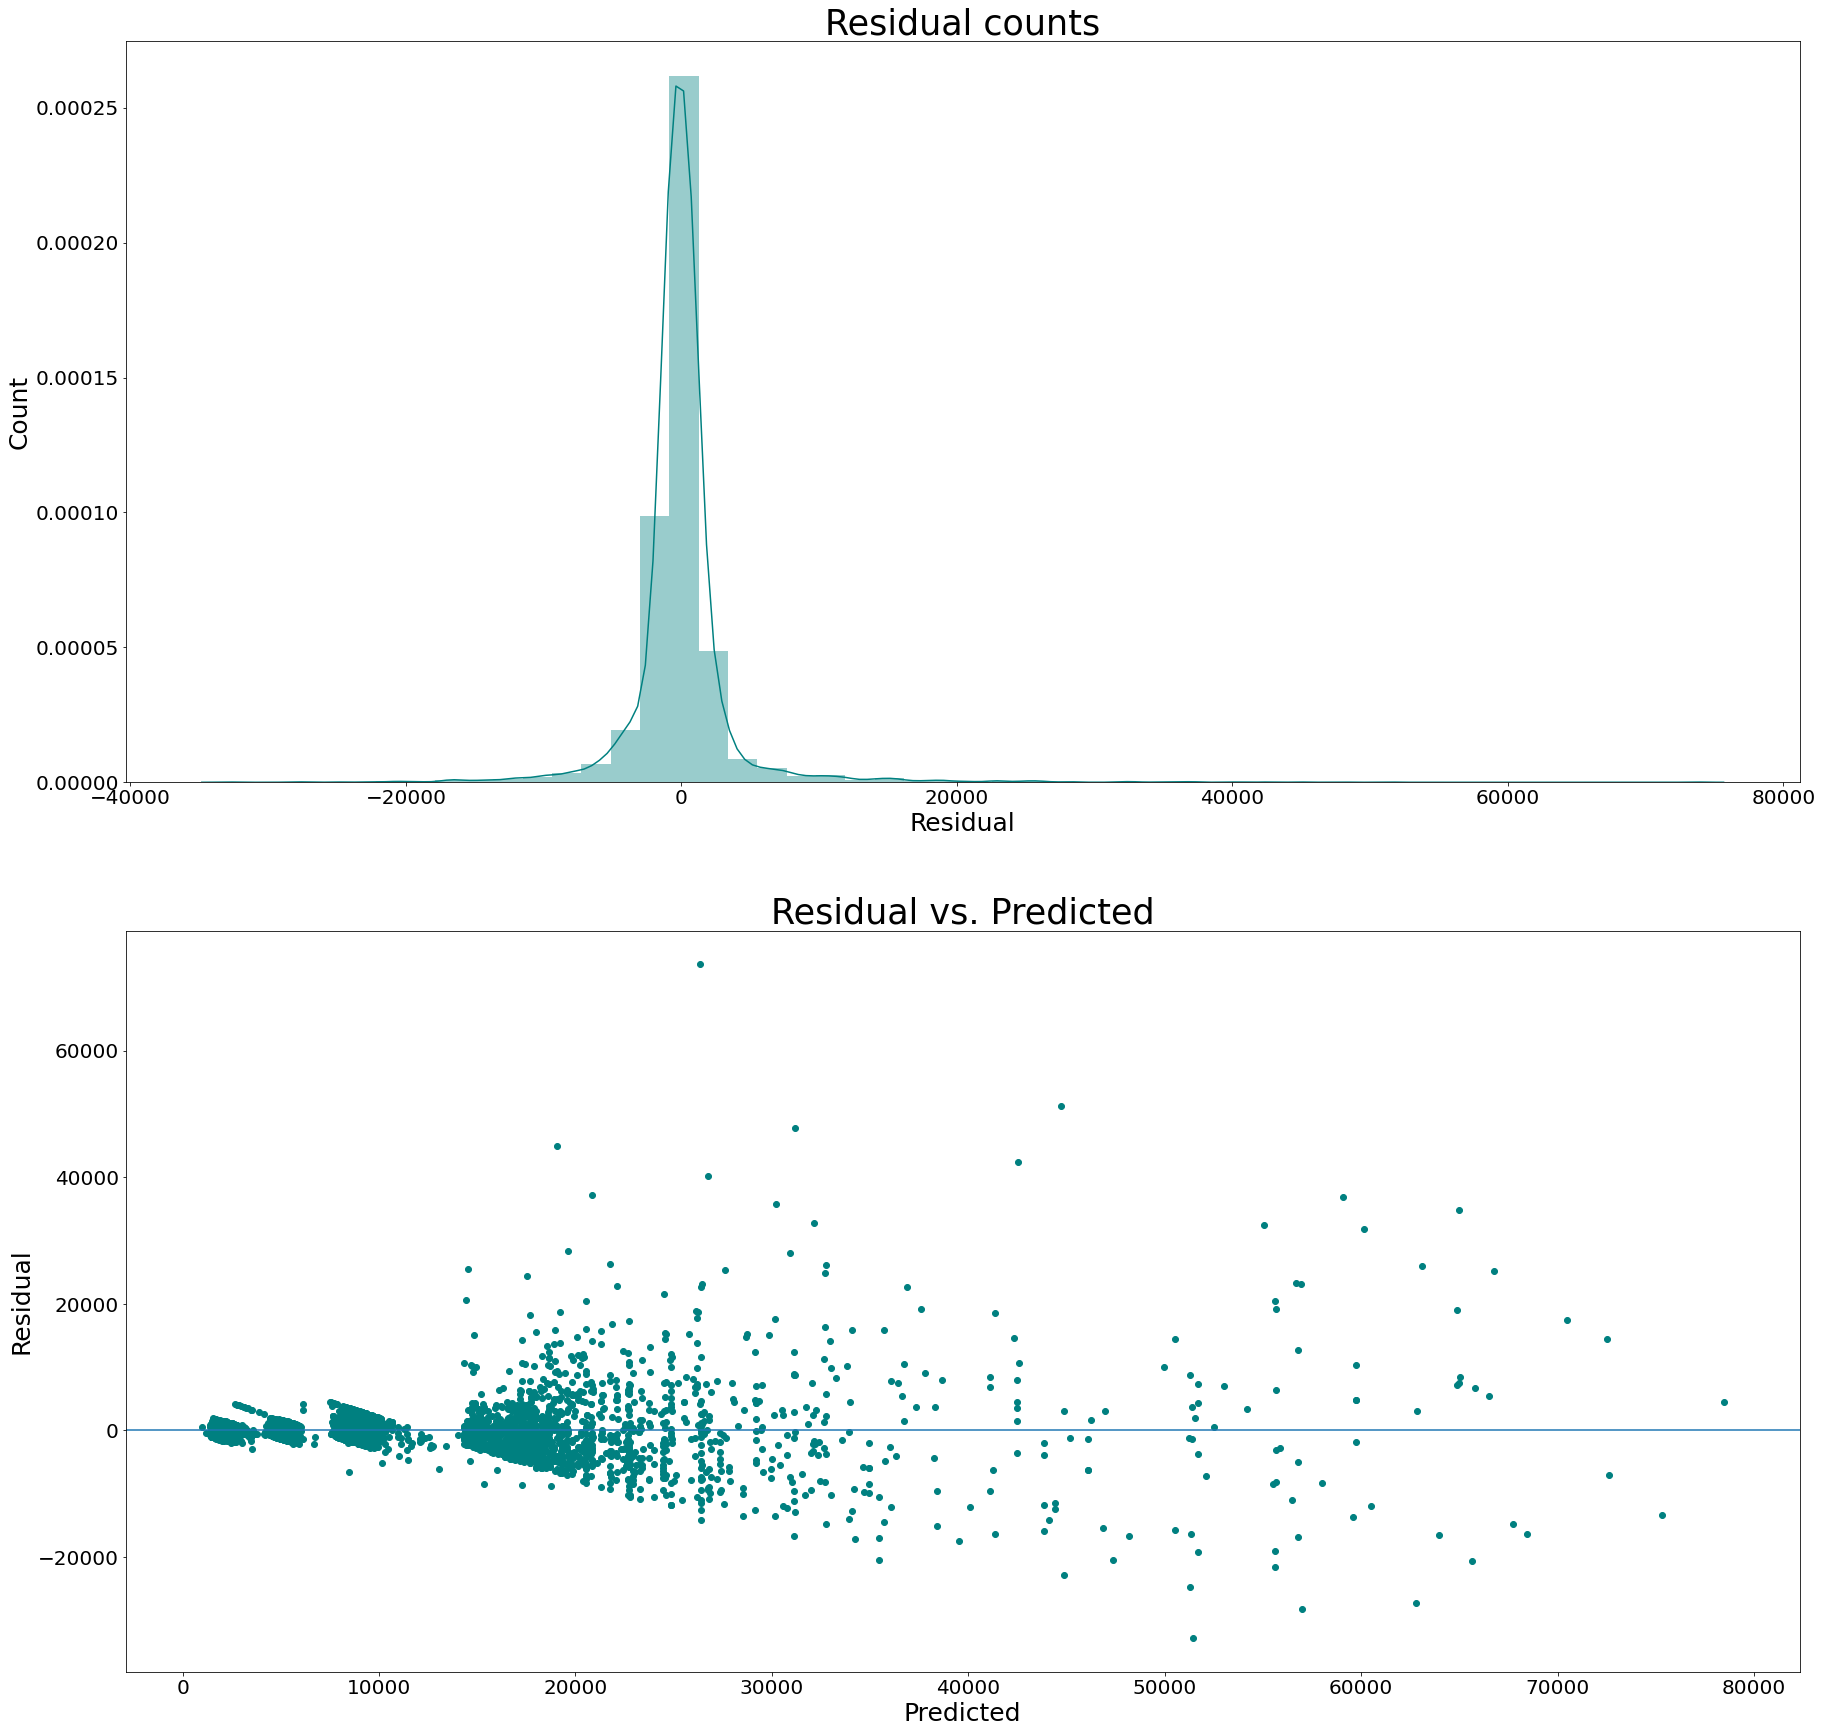

RMSE:  3847.3941115425123
Variance score: 0.85


In [ ]:
gbr =GradientBoostingRegressor()
gbr.fit(X_train, Y_train)

predicted = gbr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()


rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE: ',rmse)
print('Variance score: %.2f' % r2_score(Y_test, predicted))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


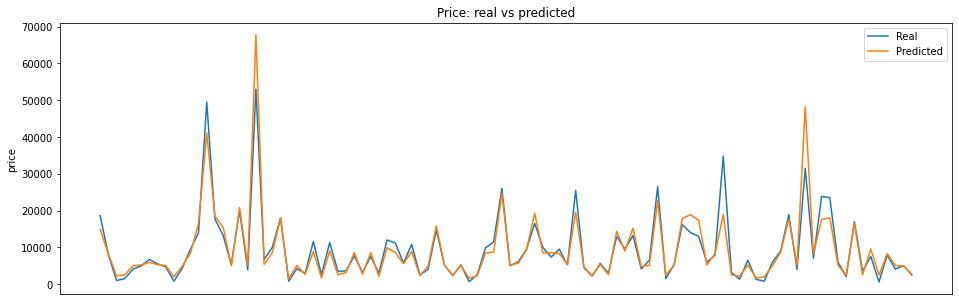

In [ ]:
A = np.array(Y_test).reshape(-1, 1)
B = predicted.reshape(-1, 1)
print(type(predicted))
print(type(Y_test))
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price")
plt.xticks(())
plt.show()

Мы должны провести остаточный анализ, чтобы проверить, соответствуют ли остатки нормальному распределению или нет. Если остатки не соответствуют нормальному распределению, то мы отказываемся  модель.
Это может быть определено с помощью графика QQ.

Text(0, 0.5, 'Ordered Values')

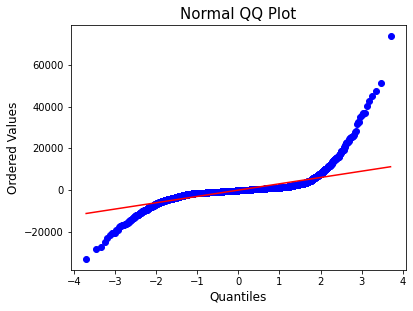

In [ ]:
plt.figure(figsize=(6, 4.5))
stats.probplot(residual, dist="norm", plot=plt)
plt.title('Normal QQ Plot',fontsize=15)
plt.xlabel('Quantiles',fontsize=12)
plt.ylabel('Ordered Values',fontsize=12)

Мы можем видеть, что остаток соответствует нормальному распределению, но есть некоторые выбросы, которые нам нужно удалить.

In [ ]:
# Create an SGDClassifier instance which will have methods to do our linear regression fitting by gradient descent
regr1 = SGDRegressor(loss="squared_loss", penalty=None)
regr1.fit(X_train, Y_train)

predicted = regr1.predict(X_test)


rmse = np.sqrt(mean_squared_error(Y_test, predicted))

print('RMSE: ',rmse)

print('Variance score: %.2f' % r2_score(Y_test, predicted))

RMSE:  2.5992927551294346e+18
Variance score: -69494529022188486767383937024.00


поскольку расстояние между знаками неодинаково, их необходимо нормализовать

In [ ]:

from IPython.display import HTML, display
import tabulate
table = [["Model","R² score","RMSE"],
         ["Linear Regression",0.59,6302.02],
         ["GradientBoostingRegressor",0.85,3850.42]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Model,R² score,RMSE
Linear Regression,0.59,6302.02
GradientBoostingRegressor,0.85,3850.42


все выборки

In [ ]:
X=df.select_dtypes(include=(object,np.number)).drop("Price(euro)",axis=1)
X=pd.get_dummies(data=X)
Y=df['Price(euro)']

In [ ]:
X.head()

,Distance,Engine_capacity(cm3),Age,km_year,prestige,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Chevrolet,Make_Chrysler,...,Style_Sedan,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Transmission_Automatic,Transmission_Manual
0,195000.0,1800.0,11,17727.272727,2,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,135000.0,1500.0,8,16875.000000,2,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
2,110000.0,1500.0,10,11000.000000,3,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
3,200000.0,1600.0,16,12500.000000,3,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,300000.0,2200.0,22,13636.363636,4,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

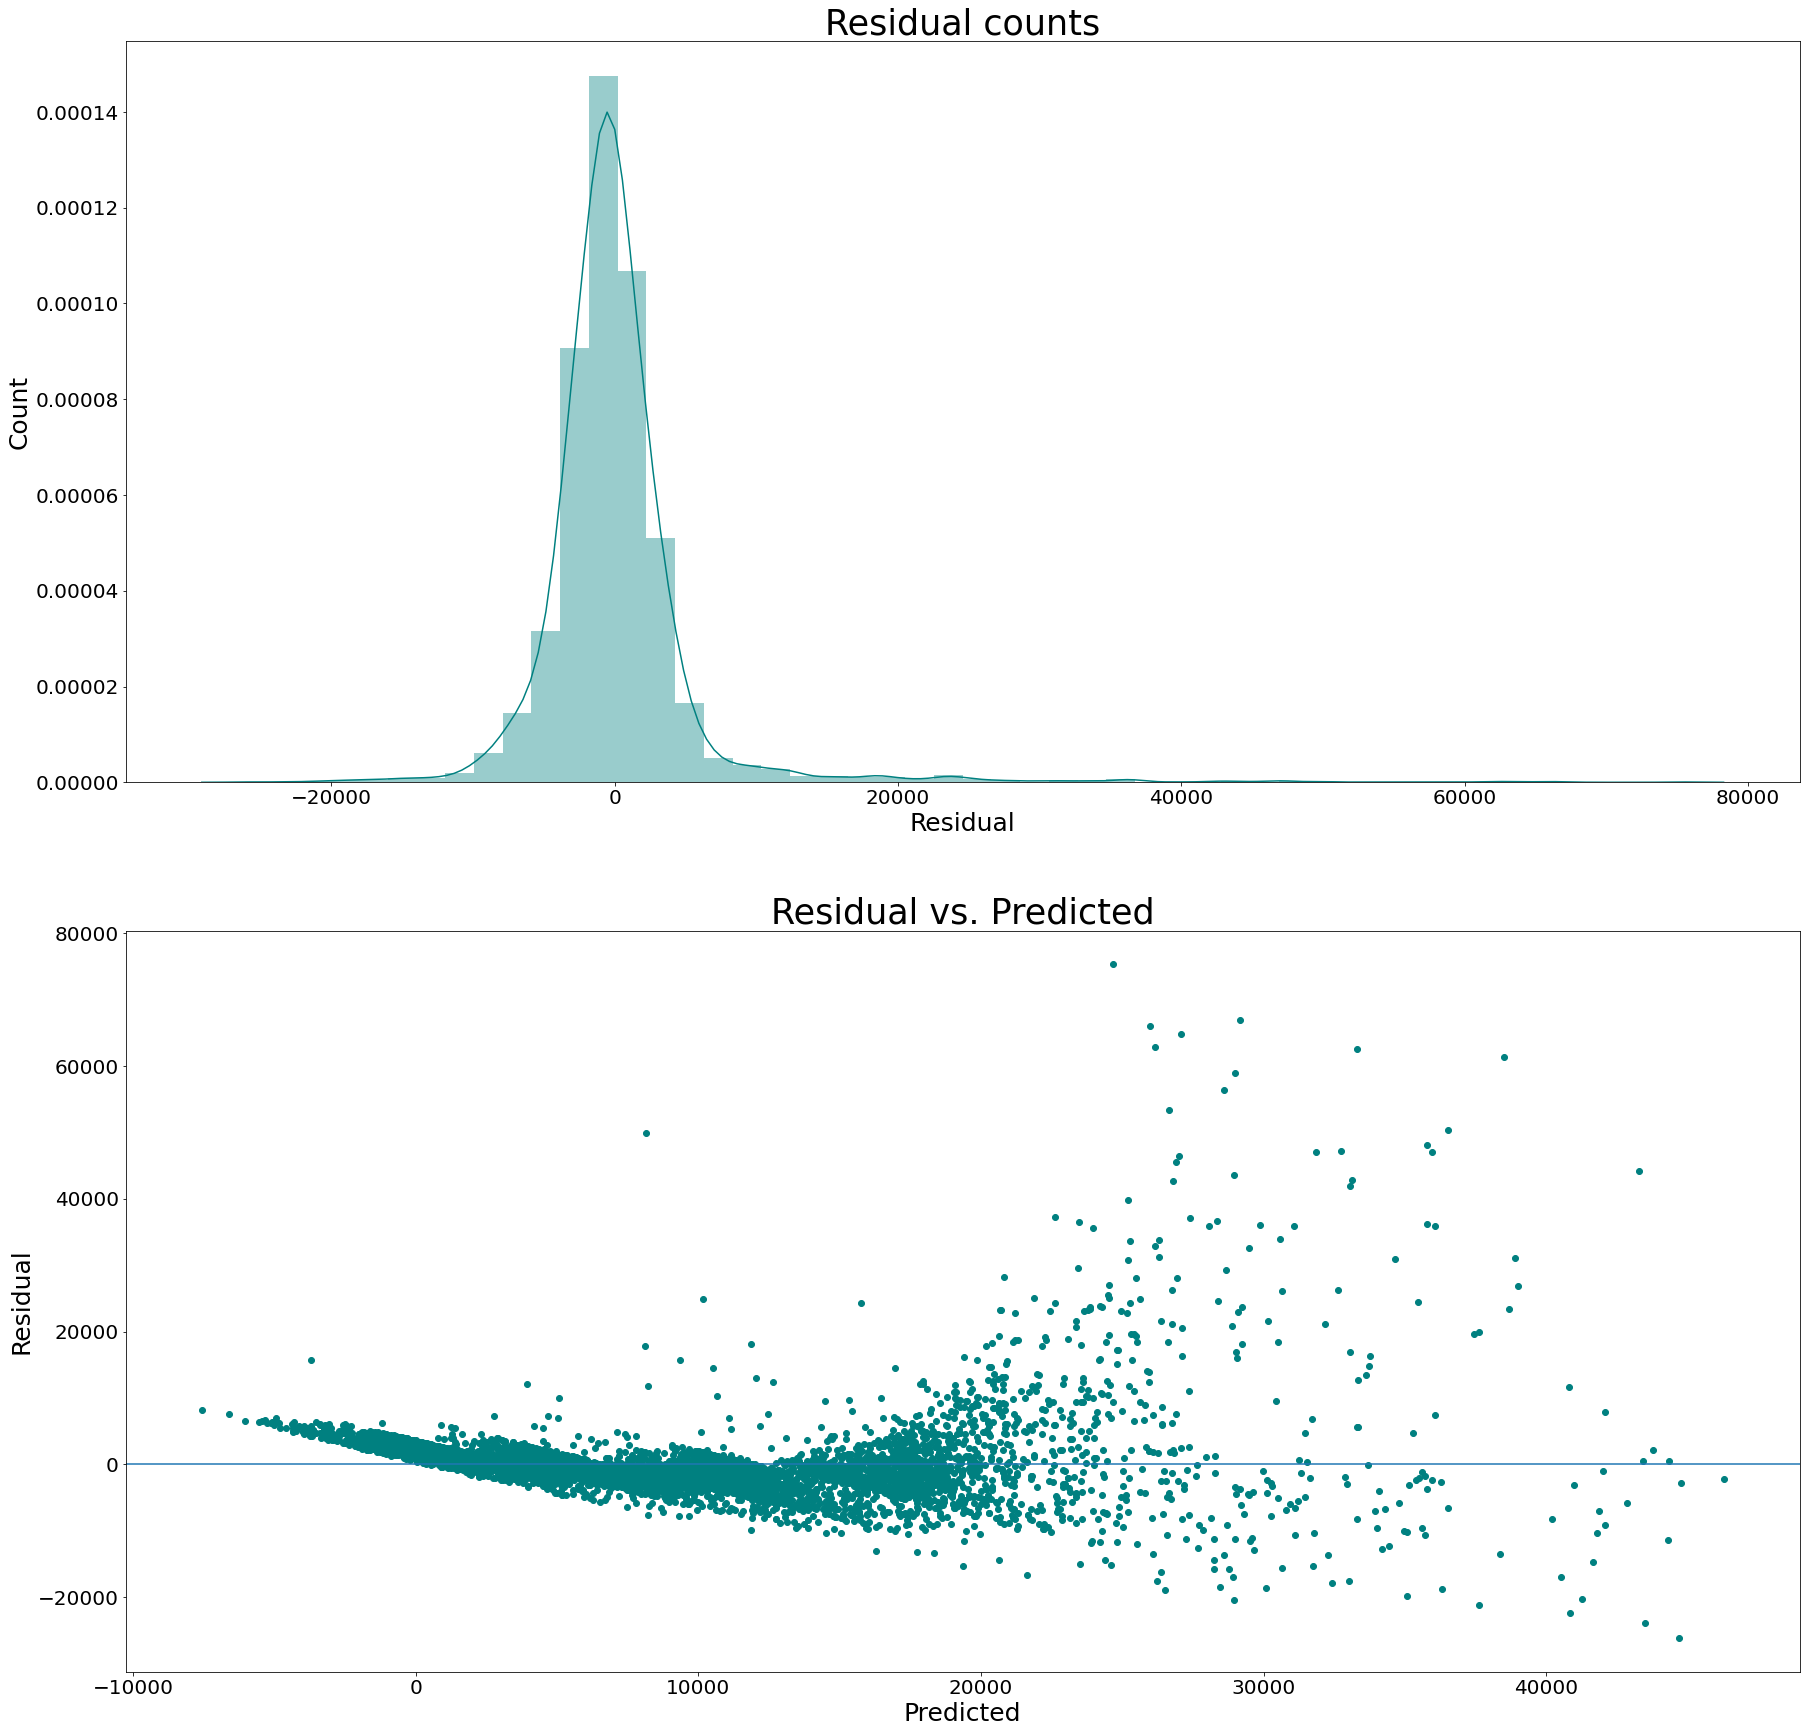

RMSE:  5727.362898647467
Variance score: 0.66


In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()


rmse = np.sqrt(mean_squared_error(Y_test, predicted))

print('RMSE: ',rmse)

print('Variance score: %.2f' % r2_score(Y_test, predicted))


In [ ]:
regr1 = linear_model.SGDRegressor()
regr1.fit(X_train, Y_train)

predicted = regr1.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, predicted))

print('RMSE: ',rmse)

print('Variance score: %.2f' % r2_score(Y_test, predicted))

RMSE:  7.429139385732867e+18
Variance score: -567697833325205163586504097792.00


In [ ]:
regr1 = linear_model.SGDRegressor()
regr1.fit(X_train, Y_train)

predicted = regr1.predict(X_train)

rmse = np.sqrt(mean_squared_error(Y_train, predicted))

print('RMSE: ',rmse)

print('Variance score: %.2f' % r2_score(Y_train, predicted))

RMSE:  6.977123194589921e+17
Variance score: -5454308304178083488807780352.00


In [ ]:
table = [["Model","R² score","RMSE"],
         ["Linear Regression",0.66,5727],
         ["gradient descent",-329999725457401513425380573184,5.252457846400524e+18]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Model,R² score,RMSE
Linear Regression,0.66,5727
gradient descent,-329999725457401513425380573184,5.252457846400524e+18


стандартизируем данные

In [ ]:
num_col=df.select_dtypes(include=[np.number])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(num_col)
num_std = pd.DataFrame(scaler.transform(num_col), columns=num_col.columns)
num_std.head()

,Distance,Engine_capacity(cm3),Price(euro),Age,km_year,prestige
0,0.162384,-0.112381,-0.181420,-0.371928,0.392292,-0.450773
1,-0.500306,-0.604333,-0.097487,-0.790766,0.274765,-0.450773
2,-0.776426,-0.604333,-0.307320,-0.511541,-0.535391,0.440272
3,0.217608,-0.440349,-0.564365,0.326136,-0.328543,0.440272
4,1.322091,0.543555,-0.628364,1.163813,-0.171839,1.331318


In [ ]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)
num_std.describe()

,Distance,Engine_capacity(cm3),Price(euro),Age,km_year,prestige
count,32074.0000,32074.0000,32074.0000,32074.0000,32074.0000,32074.0000
mean,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000
std,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
min,-1.9903,-2.7361,-0.9735,-1.7681,-2.0385,-1.3418
25%,-0.6328,-0.6043,-0.6168,-0.7908,-0.6388,-1.1191
50%,-0.0033,-0.1124,-0.2812,-0.2323,-0.0621,0.4403
75%,0.6081,0.2156,0.2724,0.4657,0.5402,1.3313
max,3.5311,5.1351,9.4971,5.2126,4.8427,1.3313


In [ ]:
X=num_std.select_dtypes(include=np.number).drop("Price(euro)",axis=1)
Y=num_std['Price(euro)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

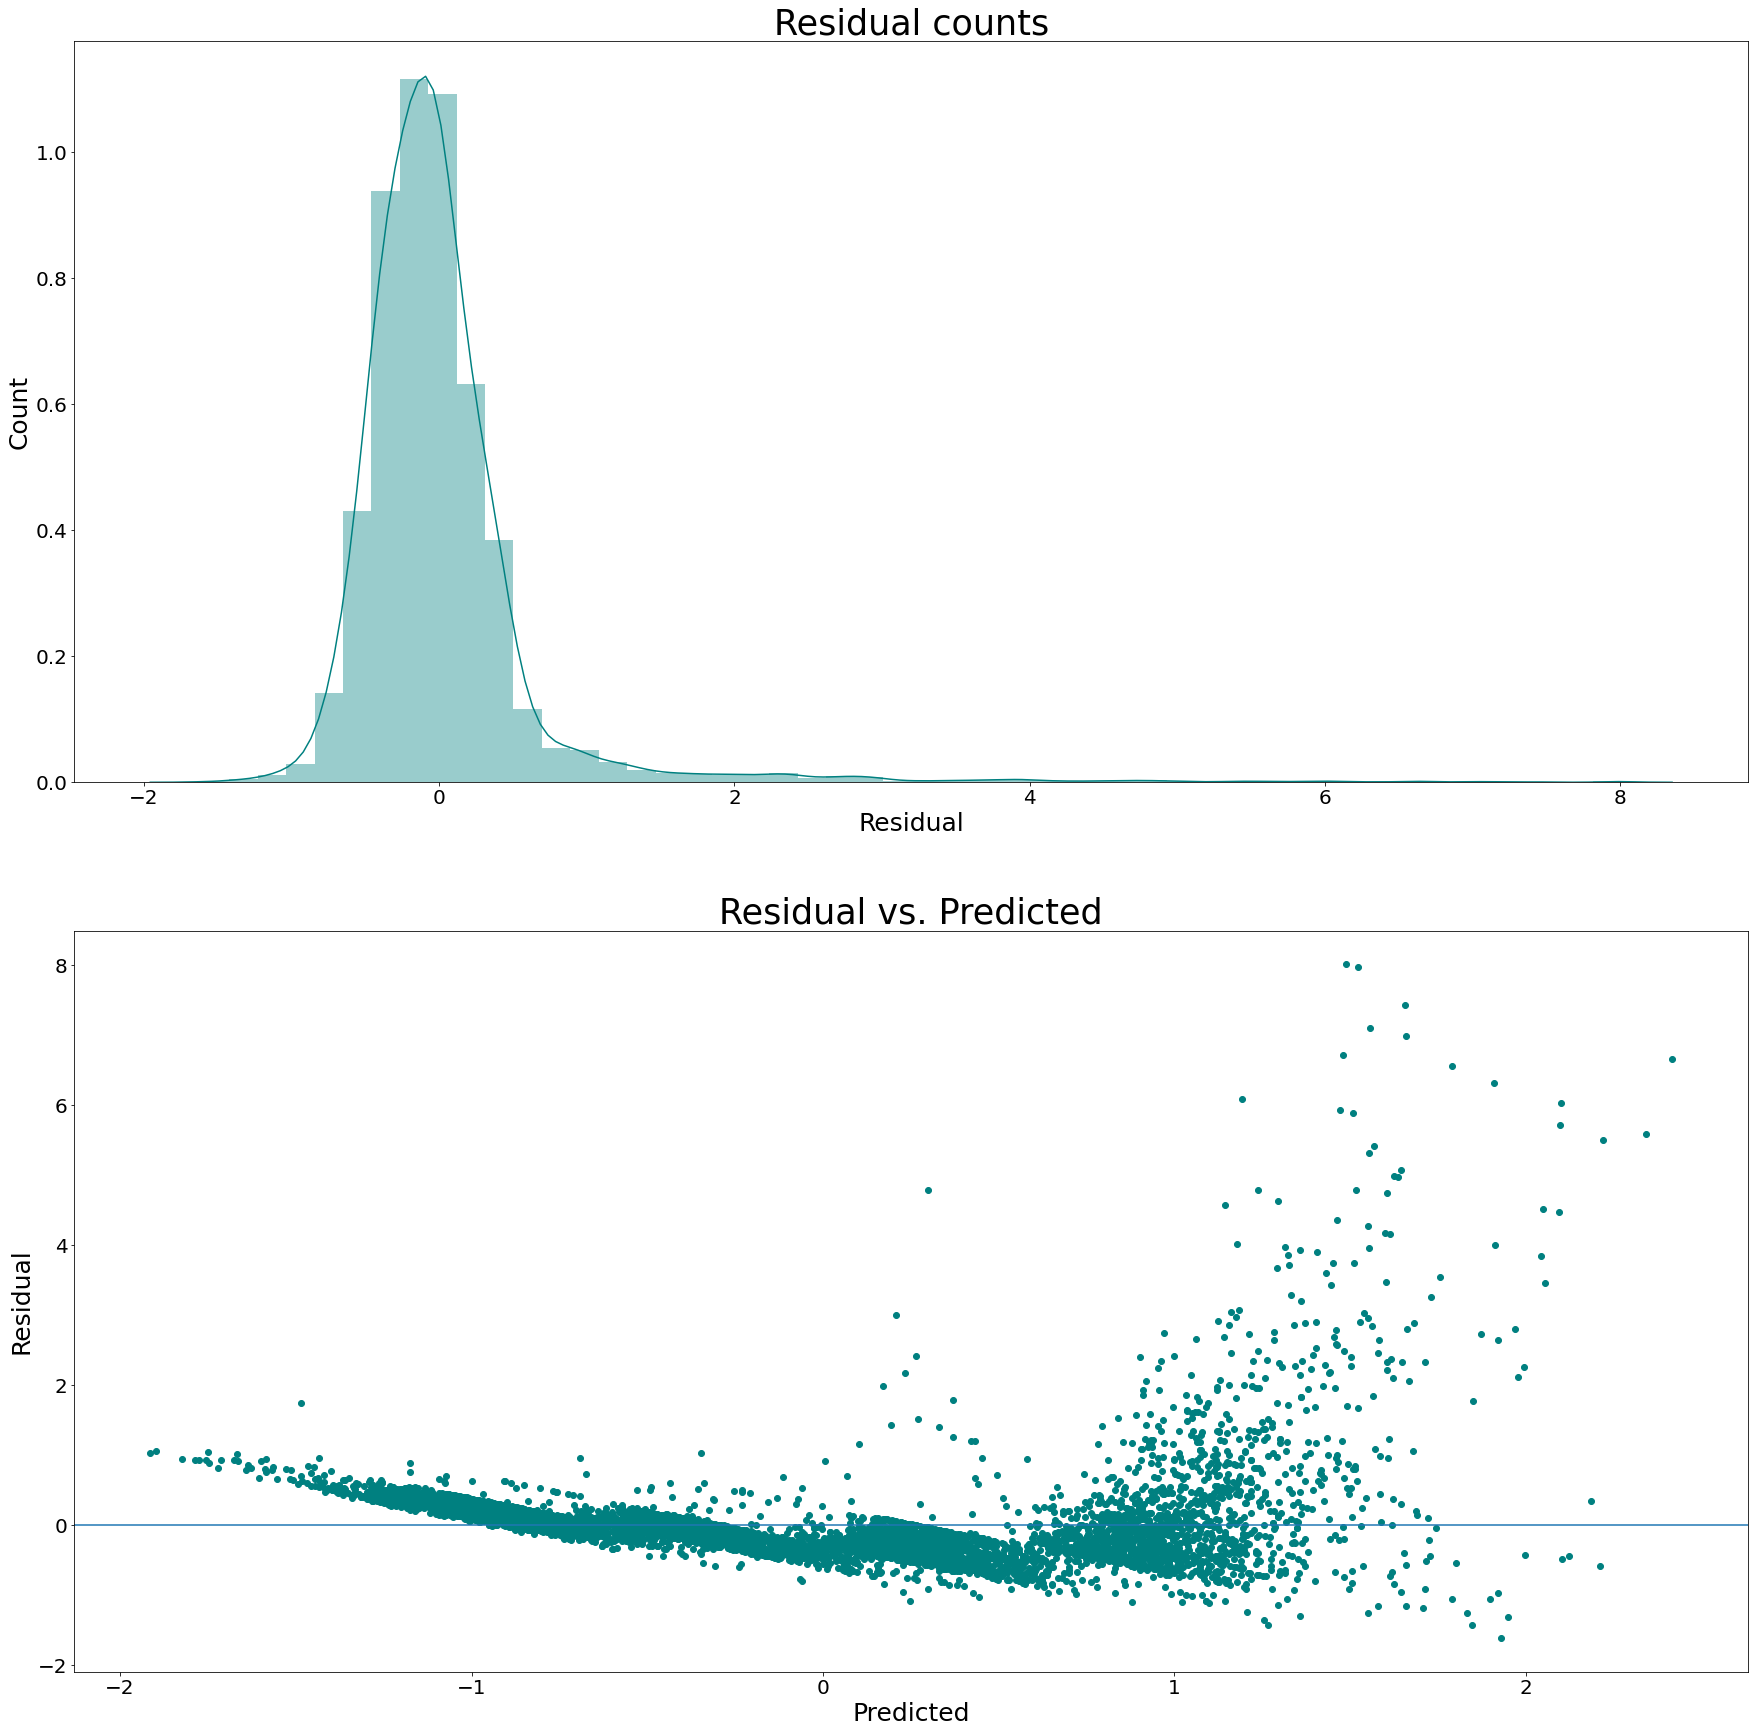

RMSE:  0.6612646824229338
Variance score: 0.59


In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

fig = plt.figure(figsize=(30,30))
ax1 = plt.subplot(211)
sns.distplot(residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.title('Residual counts',fontsize=35)
plt.xlabel('Residual',fontsize=25)
plt.ylabel('Count',fontsize=25)

ax2 = plt.subplot(212)
plt.scatter(predicted, residual, color ='teal')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xlabel('Predicted',fontsize=25)
plt.ylabel('Residual',fontsize=25)
plt.axhline(y=0)
plt.title('Residual vs. Predicted',fontsize=35)

plt.show()


rmse = np.sqrt(mean_squared_error(Y_test, predicted))

print('RMSE: ',rmse)

print('Variance score: %.2f' % r2_score(Y_test, predicted))


In [ ]:
regr1 = linear_model.SGDRegressor()
regr1.fit(X_train, Y_train)

predicted = regr1.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, predicted))

print('RMSE: ',rmse)

print('Variance score: %.2f' % r2_score(Y_test, predicted))

RMSE:  0.6626344404145592
Variance score: 0.59


In [ ]:
table = [["Model","R² score","RMSE"],
         ["Linear Regression",0.59,0.6612],
         ["gradient descent",0.59,0.6649]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Model,R² score,RMSE
Linear Regression,0.59,0.6612
gradient descent,0.59,0.6649


In [ ]:
cat_col=df.select_dtypes(include=[object])
X=pd.concat([X,cat_col], axis=1, ignore_index=False)
X.head()

,Distance,Engine_capacity(cm3),Age,km_year,prestige,Make,Model,Style,Fuel_type,Transmission
0,0.1624,-0.1124,-0.3719,0.3923,-0.4508,Toyota,Prius,Hatchback,Hybrid,Automatic
1,-0.5003,-0.6043,-0.7908,0.2748,-0.4508,Renault,Grand Scenic,Universal,Diesel,Manual
2,-0.7764,-0.6043,-0.5115,-0.5354,0.4403,Renault,Laguna,Universal,Diesel,Manual
3,0.2176,-0.4403,0.3261,-0.3285,0.4403,Opel,Astra,Universal,Metan/Propan,Manual
4,1.3221,0.5436,1.1638,-0.1718,1.3313,Mercedes,Vito,Microvan,Diesel,Manual


In [ ]:

X=pd.get_dummies(data=X)
Y=df['Price(euro)']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE: ',rmse)
print('Variance score: %.2f' % r2_score(Y_test, predicted))


RMSE:  5727.396352421228
Variance score: 0.66


In [ ]:
regr1 = linear_model.SGDRegressor()
regr1.fit(X_train, Y_train)

predicted = regr1.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, predicted))

print('RMSE: ',rmse)
print('Variance score: %.2f' % r2_score(Y_test, predicted))

RMSE:  5758.423925008687
Variance score: 0.66


все выборки нормализированны

In [ ]:
df1 = pd.read_csv('/content/df2_dum_std.csv', delimiter = ',')
df1.head()

,Distance,Engine_capacity(cm3),Price(euro),Age,km_year,class,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Chevrolet,...,Style_Sedan,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Transmission_Automatic,Transmission_Manual
0,0.1624,-0.1124,-0.1814,-0.3719,0.3923,0.4483,-0.0344,-0.2244,-0.2959,-0.1005,...,-0.6589,-0.4711,-0.9505,-0.0301,4.0583,-0.3479,-0.7267,-0.1177,1.0886,-1.0886
1,-0.5003,-0.6043,-0.0975,-0.7908,0.2748,0.4483,-0.0344,-0.2244,-0.2959,-0.1005,...,-0.6589,2.1228,1.0520,-0.0301,-0.2464,-0.3479,-0.7267,-0.1177,-0.9186,0.9186
2,-0.7764,-0.6043,-0.3073,-0.5115,-0.5354,-0.4364,-0.0344,-0.2244,-0.2959,-0.1005,...,-0.6589,2.1228,1.0520,-0.0301,-0.2464,-0.3479,-0.7267,-0.1177,-0.9186,0.9186
3,0.2176,-0.4403,-0.5644,0.3261,-0.3285,-0.4364,-0.0344,-0.2244,-0.2959,-0.1005,...,-0.6589,2.1228,-0.9505,-0.0301,-0.2464,2.8744,-0.7267,-0.1177,-0.9186,0.9186
4,1.3221,0.5436,-0.6284,1.1638,-0.1718,-0.4364,-0.0344,-0.2244,-0.2959,-0.1005,...,-0.6589,-0.4711,1.0520,-0.0301,-0.2464,-0.3479,-0.7267,-0.1177,-0.9186,0.9186


In [ ]:
X=df1.select_dtypes(include=np.number).drop("Price(euro)",axis=1)
Y=df1['Price(euro)']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE: ',rmse)
print('Variance score: %.2f' % r2_score(Y_test, predicted))

RMSE:  0.6037592901598029
Variance score: 0.66


In [ ]:
regr1 = linear_model.SGDRegressor()
regr1.fit(X_train, Y_train)

predicted = regr1.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, predicted))

print('RMSE: ',rmse)
print('Variance score: %.2f' % r2_score(Y_test, predicted))

RMSE:  0.6144242677089611
Variance score: 0.65


In [ ]:
table = [["Model","R² score","RMSE"],
         ["Linear Regression",0.66,0.603],
         ["gradient descent",0.64,0.6185]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Model,R² score,RMSE
Linear Regression,0.66,0.603
gradient descent,0.64,0.6185


стандартизированные данные не меняет распределение поэтому делаем  степенное преобразование -примерно будет Нормальное распределение

In [ ]:
from sklearn import preprocessing as prep
scaler1=prep.PowerTransformer()
scaler1.fit(X)
X_std_power = pd.DataFrame(scaler1.transform(X), columns=X.columns)
X_std_power.head()

,Distance,Engine_capacity(cm3),Age,km_year,class,Make_Alfa Romeo,Make_Audi,Make_BMW,Make_Chevrolet,Make_Chrysler,...,Style_Sedan,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,Transmission_Automatic,Transmission_Manual
0,0.2068,0.0099,-0.2351,0.4672,0.4259,-0.0344,-0.2244,-0.2959,-0.1005,-0.0509,...,-0.6589,-0.4711,-0.9505,-0.0301,4.0583,-0.3479,-0.7267,-0.1177,1.0886,-1.0886
1,-0.4714,-0.5725,-0.8113,0.3559,0.4259,-0.0344,-0.2244,-0.2959,-0.1005,-0.0509,...,-0.6589,2.1228,1.0520,-0.0301,-0.2464,-0.3479,-0.7267,-0.1177,-0.9186,0.9186
2,-0.7669,-0.5725,-0.4175,-0.4906,-0.4608,-0.0344,-0.2244,-0.2959,-0.1005,-0.0509,...,-0.6589,2.1228,1.0520,-0.0301,-0.2464,-0.3479,-0.7267,-0.1177,-0.9186,0.9186
3,0.2610,-0.3692,0.5188,-0.2610,-0.4608,-0.0344,-0.2244,-0.2959,-0.1005,-0.0509,...,-0.6589,2.1228,-0.9505,-0.0301,-0.2464,2.8744,-0.7267,-0.1177,-0.9186,0.9186
4,1.2936,0.6531,1.1746,-0.0928,-0.4608,-0.0344,-0.2244,-0.2959,-0.1005,-0.0509,...,-0.6589,-0.4711,1.0520,-0.0301,-0.2464,-0.3479,-0.7267,-0.1177,-0.9186,0.9186


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_std_power, Y, test_size = .20, random_state = 42)

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

predicted = regr.predict(X_test)
residual = Y_test - predicted

rmse = np.sqrt(mean_squared_error(Y_test, predicted))
print('RMSE: ',rmse)
print('Variance score: %.2f' % r2_score(Y_test, predicted))

RMSE:  0.5747970475435208
Variance score: 0.69


<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


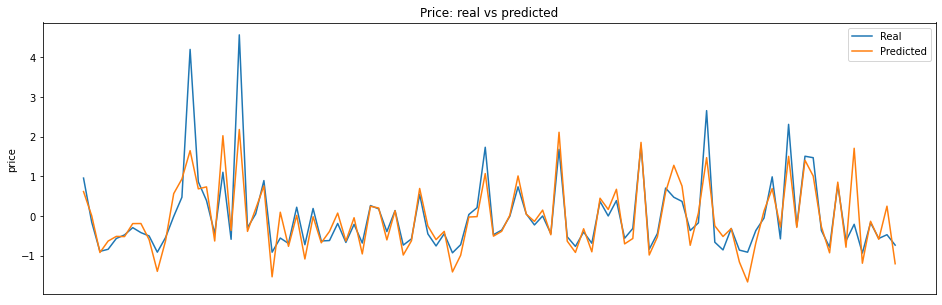

In [ ]:
A = np.array(Y_test).reshape(-1, 1)
B = predicted.reshape(-1, 1)
print(type(predicted))
print(type(Y_test))
plt.rcParams['figure.figsize'] = 16,5
plt.figure()
plt.plot(A[-100:], label="Real")
plt.plot(B[-100:], label="Predicted")
plt.legend()
plt.title("Price: real vs predicted")
plt.ylabel("price")
plt.xticks(())
plt.show()

Text(0, 0.5, 'Ordered Values')

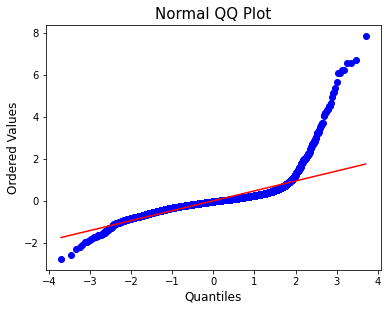

In [ ]:
plt.figure(figsize=(6, 4.5))
stats.probplot(residual, dist="norm", plot=plt)
plt.title('Normal QQ Plot',fontsize=15)
plt.xlabel('Quantiles',fontsize=12)
plt.ylabel('Ordered Values',fontsize=12)

In [ ]:
regr1 = linear_model.SGDRegressor()
regr1.fit(X_train, Y_train)

predicted = regr1.predict(X_test)
rmse = np.sqrt(mean_squared_error(Y_test, predicted))

print('RMSE: ',rmse)
print('Variance score: %.2f' % r2_score(Y_test, predicted))

RMSE:  0.5800578407014063
Variance score: 0.69


In [ ]:
table = [["Model","R² score","RMSE"],
         ["Linear Regression",0.69,0.59],
         ["gradient descent",0.68,0.59]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

Model,R² score,RMSE
Linear Regression,0.69,0.59
gradient descent,0.68,0.59


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [ ]:
df = pd.read_csv('/content/df2.csv', delimiter = ',')
df=df.drop("class",axis=1)
df.head()

,Make,Model,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,prestige
0,Toyota,Prius,Hatchback,195000.0000,1800.0000,Hybrid,Automatic,7750.0000,11,17727.2727,2
1,Renault,Grand Scenic,Universal,135000.0000,1500.0000,Diesel,Manual,8550.0000,8,16875.0000,2
2,Renault,Laguna,Universal,110000.0000,1500.0000,Diesel,Manual,6550.0000,10,11000.0000,3
3,Opel,Astra,Universal,200000.0000,1600.0000,Metan/Propan,Manual,4100.0000,16,12500.0000,3
4,Mercedes,Vito,Microvan,300000.0000,2200.0000,Diesel,Manual,3490.0000,22,13636.3636,4


In [ ]:
X=df.select_dtypes(include=np.number).drop("Price(euro)",axis=1)
Y=df['Price(euro)']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

In [ ]:
def create_polynomial_regression_model(degree):
  "Creates a polynomial regression model for the given degree"
  poly_features = PolynomialFeatures(degree=degree)

  # transform the features to higher degree features.
  X_train_poly = poly_features.fit_transform(X_train)

  # fit the transformed features to Linear Regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, Y_train)


  # predicting on test data-set
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))


  # evaluating the model on test dataset
  rmse_test = np.sqrt(mean_squared_error(Y_test, y_test_predict))
  r2_test = r2_score(Y_test, y_test_predict)
  return r2_test,rmse_test
  #print("The model performance for the test set")
  #print("-------------------------------------------")
  #print("RMSE of test set is {}".format(rmse_test))
  #print("R2 score of test set is {}".format(r2_test))

In [ ]:
create_polynomial_regression_model(4)

(0.7740534237846174, 4686.868522552947)

In [ ]:
number_degrees = [1,2,3,4,5,6,7]
plt_mean_squared_error = []
r2_score1=[]
for num in number_degrees:
  degree=num
  r2 =create_polynomial_regression_model(num)[0]
  rmse=create_polynomial_regression_model(num)[1]
  plt_mean_squared_error.append(rmse)
  r2_score1.append(r2)


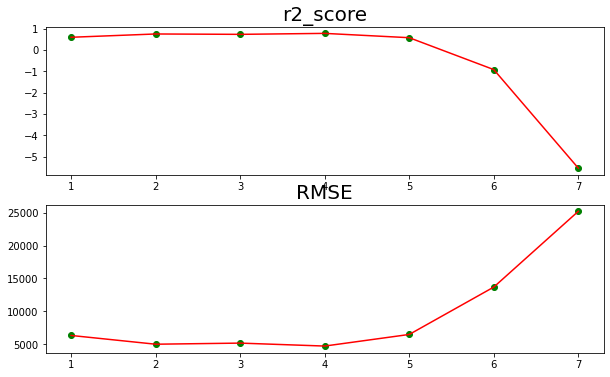

In [ ]:

fig = plt.figure(figsize=(10,6))
ax1 = plt.subplot(211)
plt.scatter(number_degrees,r2_score1, color="green")
plt.plot(number_degrees,r2_score1, color="red")
plt.title('r2_score',fontsize=20)

ax2 = plt.subplot(212)
plt.scatter(number_degrees,plt_mean_squared_error, color="green")
plt.plot(number_degrees,plt_mean_squared_error, color="red")
plt.title('RMSE',fontsize=20)
plt.show()

In [ ]:
print(max(r2_score1),r2_score1.index(max(r2_score1))+1)
print(min(plt_mean_squared_error),plt_mean_squared_error.index(min(plt_mean_squared_error))+1)

0.7740534237846174 4
4686.868522552947 4


In [ ]:
df = pd.read_csv('/content/df2_cat.csv', delimiter = ',')
df=df.drop("class",axis=1)
df.head()

,Make,Model,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,prestige
0,40,82,4,195000.0000,1800.0000,2,1,7750.0000,11,17727.2727,2
1,32,52,11,135000.0000,1500.0000,0,0,8550.0000,8,16875.0000,2
2,32,61,11,110000.0000,1500.0000,0,0,6550.0000,10,11000.0000,3
3,28,13,11,200000.0000,1600.0000,3,0,4100.0000,16,12500.0000,3
4,23,116,5,300000.0000,2200.0000,0,0,3490.0000,22,13636.3636,4


In [ ]:
X=df.select_dtypes(include=(object,np.number)).drop("Price(euro)",axis=1)

Y=df['Price(euro)']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

In [ ]:
create_polynomial_regression_model(4)

(0.7795716316415409, 4629.281935800794)

In [ ]:
df = pd.read_csv('/content/df2_cat_std.csv', delimiter = ',')
df=df.drop("class",axis=1)
df.head()

,Make,Model,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,prestige
0,1.1499,0.4857,-1.1015,0.1624,-0.1124,0.0589,1.0886,-0.1814,-0.3719,0.3923,-0.4508
1,0.5721,-0.3662,1.0736,-0.5003,-0.6043,-1.0101,-0.9186,-0.0975,-0.7908,0.2748,-0.4508
2,0.5721,-0.1106,1.0736,-0.7764,-0.6043,-1.0101,-0.9186,-0.3073,-0.5115,-0.5354,0.4403
3,0.2832,-1.4736,1.0736,0.2176,-0.4403,0.5933,-0.9186,-0.5644,0.3261,-0.3285,0.4403
4,-0.0779,1.4512,-0.7908,1.3221,0.5436,-1.0101,-0.9186,-0.6284,1.1638,-0.1718,1.3313


In [ ]:
X=df.select_dtypes(include=(object,np.number)).drop("Price(euro)",axis=1)

Y=df['Price(euro)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

create_polynomial_regression_model(4)

(0.8197427772441901, 0.4392074069922152)

In [ ]:
df = pd.read_csv('/content/df2_cat_std_power.csv', delimiter = ',')
df=df.drop("class",axis=1)
X=df.select_dtypes(include=(object,np.number)).drop("Price(euro)",axis=1)

Y=df['Price(euro)']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .20, random_state = 42)

create_polynomial_regression_model(4)

(0.9479064223380267, 0.22828450423600086)

In [ ]:
table = [["table","df","df_cat","df_cat_std","df_cat_std_power"],
         ["R² score  ",0.772,0.778,0.81,0.94],
         ["RMSE  ",4886,4629,0.43,0.22]]
display(HTML(tabulate.tabulate(table, tablefmt='html')))

table,df,df_cat,df_cat_std,df_cat_std_power
R² score,0.772,0.778,0.81,0.94
RMSE,4886,4629,0.43,0.22
